<a href="https://colab.research.google.com/github/abishekvp-prog/Iris-Flower-Classification/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris.data


In [3]:
from sklearn.model_selection import train_test_split


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
iris_data = pd.read_csv('iris.data')

In [20]:

iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [21]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [23]:
iris_data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

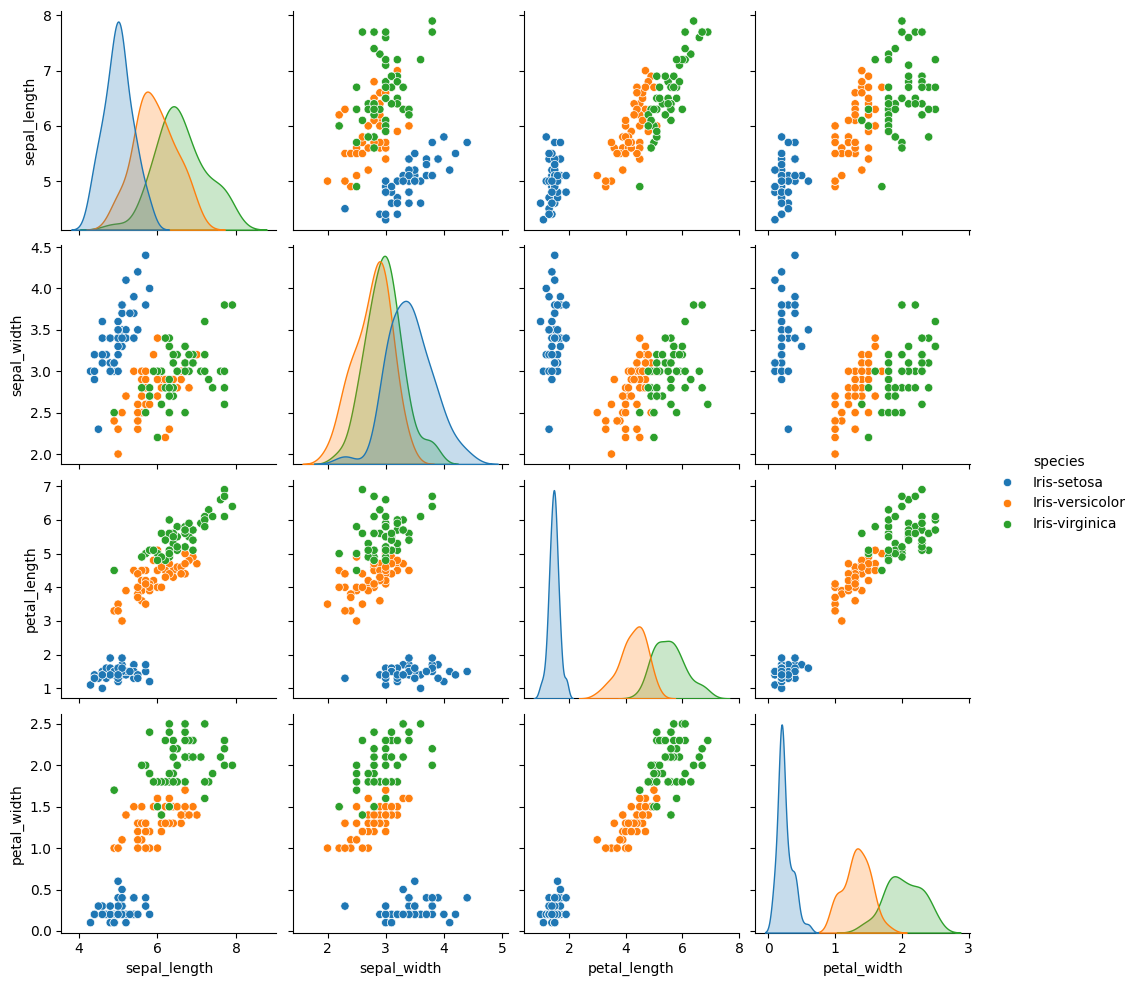

In [24]:
sns.pairplot(iris_data, hue='species')


<Axes: >

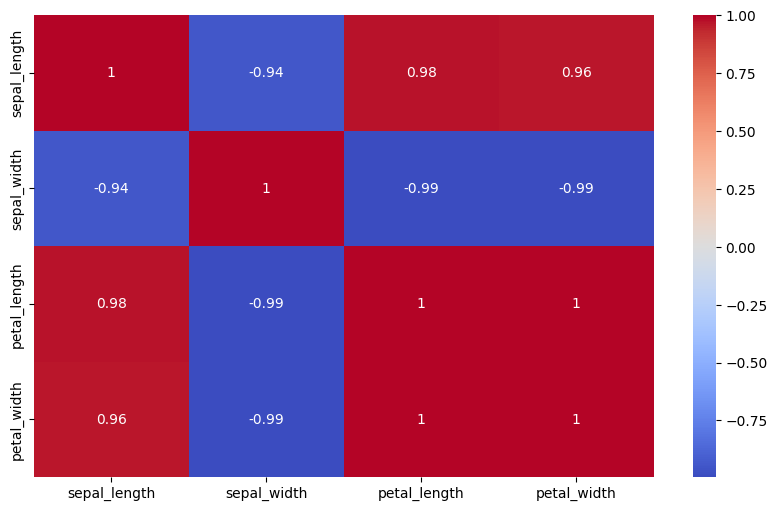

In [27]:
plt.figure(figsize=(10, 6))
corr_matrix = iris_data.drop(columns='species').corr()
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm')


In [29]:
X = iris_data.drop('species', axis=1)
Y=iris_data['species']

In [31]:
x_scaled=StandardScaler().fit_transform(X)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 10,  3],
       [ 0,  1, 12]])

In [37]:
classification_report(y_test, y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        19\nIris-versicolor       0.91      0.77      0.83        13\n Iris-virginica       0.80      0.92      0.86        13\n\n       accuracy                           0.91        45\n      macro avg       0.90      0.90      0.90        45\n   weighted avg       0.92      0.91      0.91        45\n'

<Axes: >

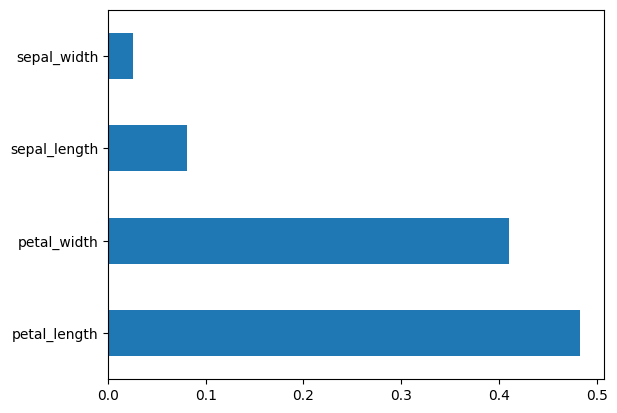

In [39]:
feature_importances = pd.Series(clf.feature_importances_, index=iris_data.columns[:-1])  # Exclude 'species'
feature_importances.nlargest(4).plot(kind='barh')